In [2]:
# import matplotlib

# class mplDeprecation(UserWarning):
#     pass

# matplotlib.cbook.mplDeprecation = mplDeprecation
import scanpy as sc
import scvelo as scv
import pandas as pd

scv.set_figure_params()

In [3]:
adata = sc.read("data/104.RNA_velocity/anndata.h5ad")
# loom = sc.read("data/103.self_workflow/velocyto_combined.loom")
# adata_merge = scv.utils.merge(adata, loom)

In [4]:
samples = ["N1", "N2", "N4", "T1", "T2", "T4"]

adata_spliced_list = []
adata_unspliced_list = []

for sample in samples:
    adata_spliced_sample = sc.read_mtx(
        f"data/103.self_workflow/{sample}/output/attachment/RNAvelocity_matrix/spliced.mtx.gz"
    ).T
    adata_unspliced_sample = sc.read_mtx(
        f"data/103.self_workflow/{sample}/output/attachment/RNAvelocity_matrix/unspliced.mtx.gz"
    ).T

    adata_spliced_sample.obs["cell_id"] = pd.read_csv(
        f"data/103.self_workflow/{sample}/output/attachment/RNAvelocity_matrix/barcodes.tsv.gz",
        header=None,
    )[0].apply(lambda x: f"{sample}_{x}").tolist()
    adata_unspliced_sample.obs["cell_id"] = adata_spliced_sample.obs["cell_id"]
    adata_spliced_sample.obs.index = adata_spliced_sample.obs["cell_id"]
    adata_unspliced_sample.obs.index = adata_unspliced_sample.obs["cell_id"]

    adata_features_sample = pd.read_csv(
        f"data/103.self_workflow/{sample}/output/attachment/RNAvelocity_matrix/features.tsv.gz",
        header=None,
    )
    adata_spliced_sample.var["gene_name"] = adata_features_sample[0].tolist()
    adata_spliced_sample.var.index = adata_spliced_sample.var["gene_name"]
    adata_unspliced_sample.var["gene_name"] = adata_features_sample[0].tolist()
    adata_unspliced_sample.var.index = adata_unspliced_sample.var["gene_name"]

    adata_spliced_list.append(adata_spliced_sample)
    adata_unspliced_list.append(adata_unspliced_sample)

adata_spliced_merge = adata_spliced_list[0].concatenate(adata_spliced_list[1:], index_unique=None)
adata_unspliced_merge = adata_unspliced_list[0].concatenate(adata_unspliced_list[1:], index_unique=None)

In [26]:
pd.read_csv(
        f"data/103.self_workflow/N1/output/attachment/RNAvelocity_matrix/barcodes.tsv.gz",
        header=None
    )[0].tolist()

['CELL3_N2',
 'CELL4_N2',
 'CELL5_N4',
 'CELL6_N3',
 'CELL7_N2',
 'CELL8_N2',
 'CELL9_N3',
 'CELL11_N2',
 'CELL13_N2',
 'CELL15_N3',
 'CELL16_N2',
 'CELL20_N2',
 'CELL21_N2',
 'CELL23_N2',
 'CELL24_N2',
 'CELL26_N2',
 'CELL27_N3',
 'CELL28_N2',
 'CELL29_N4',
 'CELL31_N2',
 'CELL33_N2',
 'CELL34_N4',
 'CELL35_N2',
 'CELL36_N2',
 'CELL39_N2',
 'CELL41_N3',
 'CELL42_N2',
 'CELL44_N2',
 'CELL45_N3',
 'CELL47_N3',
 'CELL49_N2',
 'CELL50_N2',
 'CELL51_N3',
 'CELL52_N3',
 'CELL53_N2',
 'CELL55_N2',
 'CELL56_N4',
 'CELL57_N2',
 'CELL58_N4',
 'CELL59_N2',
 'CELL60_N5',
 'CELL62_N2',
 'CELL63_N2',
 'CELL65_N2',
 'CELL67_N2',
 'CELL69_N7',
 'CELL70_N2',
 'CELL71_N2',
 'CELL72_N2',
 'CELL73_N3',
 'CELL74_N2',
 'CELL75_N3',
 'CELL78_N2',
 'CELL80_N2',
 'CELL82_N3',
 'CELL86_N3',
 'CELL87_N2',
 'CELL88_N2',
 'CELL89_N2',
 'CELL90_N2',
 'CELL92_N2',
 'CELL93_N3',
 'CELL94_N2',
 'CELL95_N2',
 'CELL96_N2',
 'CELL97_N2',
 'CELL99_N3',
 'CELL101_N2',
 'CELL105_N2',
 'CELL106_N2',
 'CELL107_N2',
 'CELL108

In [ ]:
# filter adata var and obs by the intersection of adata_spliced_merge obs and var
adata_intersect=adata[adata_spliced_merge.obs.index, adata_spliced_merge.var.index].copy()

AnnData object with n_obs × n_vars = 84146 × 31925
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'dataset', 'barcode', 'nUMI', 'nGene', 'mito', 'ribo', 'hemo', 'group', 'RNA_snn_res.0.2', 'seurat_clusters', 'cell_type', 'cell_type_dtl'
    var: 'names'
    obsm: 'X_harmony', 'X_pca', 'X_umap_integrated', 'X_umap_unintegrated'
    layers: 'data_RNA'

In [13]:
# adata_intersect
adata_intersect.layers["spliced"] = adata_spliced_merge.X
adata_intersect.layers["unspliced"] = adata_unspliced_merge.X

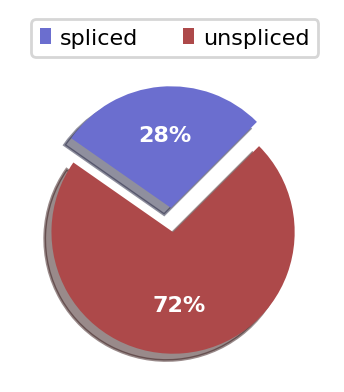

In [15]:
scv.pl.proportions(adata_intersect)

In [16]:
scv.pp.filter_and_normalize(adata_intersect, n_top_genes=2000)
scv.pp.moments(adata_intersect, n_pcs=30, n_neighbors=30)

Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


/opt/conda/lib/python3.12/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_1684/2322006151.py:2: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata_intersect, n_pcs=30, n_neighbors=30)
/opt/conda/lib/python3.12/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(


    finished (0:00:57) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:08) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [17]:
scv.tl.velocity(adata_intersect)

computing velocities


/opt/conda/lib/python3.12/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:01:33) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [20]:
scv.tl.velocity_graph(adata_intersect, n_jobs=40)

computing velocity graph (using 40/64 cores)


/opt/conda/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=1684) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/conda/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=1684) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()


    finished (0:01:53) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/opt/conda/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/conda/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/conda/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/conda/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

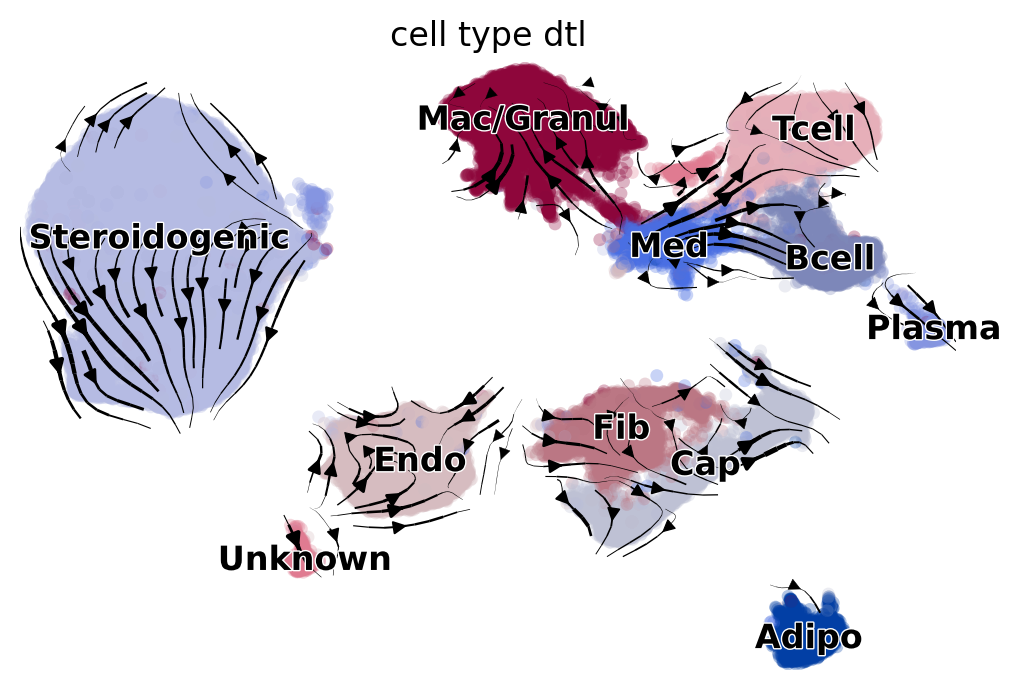

In [23]:
scv.pl.velocity_embedding_stream(
    adata_intersect, basis="X_umap_integrated", color="cell_type_dtl"
)